In [71]:
# The following provide examples to identify and remove outliers
# Utilize MinMax and standard to 
# Also includes visualizations to view outliers
# We will start by normalizing the data and looking a few boxplots
# Note: you may need to change the directory 


import numpy as np
import pandas as pd
import sklearn.datasets as ds
import matplotlib.pyplot as plt
import os

os.chdir('C:\\Users\\mbroome\\Documents\\Python\\Preprocessing')

In [72]:
datasetsk = ds.load_boston()
dataset = pd.DataFrame(data = datasetsk['data'], columns = datasetsk['feature_names'])
# dataset.info()
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [73]:
type(datasetsk)

sklearn.utils.Bunch

In [74]:
# standardizing before identifying analyzing

from sklearn.preprocessing import StandardScaler

ssc = StandardScaler()
var_norm = ssc.fit_transform(dataset)

# Create dataframe out of result so we can use .describe() later
datasetnorm = pd.DataFrame(data = var_norm, columns = dataset.columns)


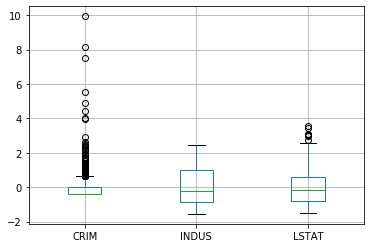

In [75]:
boxplot = datasetnorm.boxplot(column = ["CRIM", "INDUS", "LSTAT"])

In [76]:
datasetnorm.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02
mean,-8.787437e-17,-6.343191e-16,-2.682911e-15,4.701992e-16,2.490322e-15,-1.145230e-14,-1.407855e-15,9.210902e-16,5.441409e-16,-8.868619e-16,-9.205636e-15,8.163101e-15,-3.370163e-16
std,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00
min,-4.197819e-01,-4.877224e-01,-1.557842e+00,-2.725986e-01,-1.465882e+00,-3.880249e+00,-2.335437e+00,-1.267069e+00,-9.828429e-01,-1.313990e+00,-2.707379e+00,-3.907193e+00,-1.531127e+00
25%,-4.109696e-01,-4.877224e-01,-8.676906e-01,-2.725986e-01,-9.130288e-01,-5.686303e-01,-8.374480e-01,-8.056878e-01,-6.379618e-01,-7.675760e-01,-4.880391e-01,2.050715e-01,-7.994200e-01
50%,-3.906665e-01,-4.877224e-01,-2.110985e-01,-2.725986e-01,-1.442174e-01,-1.084655e-01,3.173816e-01,-2.793234e-01,-5.230014e-01,-4.646726e-01,2.748590e-01,3.811865e-01,-1.812536e-01
75%,7.396560e-03,4.877224e-02,1.015999e+00,-2.725986e-01,5.986790e-01,4.827678e-01,9.067981e-01,6.623709e-01,1.661245e+00,1.530926e+00,8.065758e-01,4.336510e-01,6.030188e-01
max,9.933931e+00,3.804234e+00,2.422565e+00,3.668398e+00,2.732346e+00,3.555044e+00,1.117494e+00,3.960518e+00,1.661245e+00,1.798194e+00,1.638828e+00,4.410519e-01,3.548771e+00


In [77]:
from sklearn.neighbors import LocalOutlierFactor

# Define the number of neighbors and the contamination rate

loc = LocalOutlierFactor(n_neighbors = 5, contamination = .2)

# loc.fit_predict(x) will establish a numpy array of 1's and -1's

outliers_loc = loc.fit_predict(datasetnorm)

# Establish a new column in datasetnorm to include outlier indicator
# Need to covert the Series outliers_loc to a dataframe column 

datasetout = datasetnorm
datasetout["OutliersNeigh"] = pd.DataFrame(outliers_loc)

type(outliers_loc)


numpy.ndarray

In [79]:
datasetout["OutliersNeigh"].value_counts()

 1    405
-1    101
Name: OutliersNeigh, dtype: int64

In [81]:
from sklearn.covariance import EllipticEnvelope

# Establish the proportion to be identified as an outlier

ee = EllipticEnvelope(contamination = .2)

outlier_ee = ee.fit_predict(datasetnorm)

datasetout["OutliersEll"] = pd.DataFrame(outlier_ee)



In [85]:
datasetout["OutliersEll"].value_counts()

 1    404
-1    102
Name: OutliersEll, dtype: int64

In [104]:
# Utilize two variables and view results

X_n = datasetnorm.copy()[["AGE", "DIS"]]
X_e = X_n

# Establish Contamination & number of neighbors. You can change this to play with results

cont = .3
neigh = 30

# Setup instance of object with parameters above

loc = LocalOutlierFactor(n_neighbors = neigh, contamination = cont)
ee = EllipticEnvelope(contamination = cont)

# Predict  based on parameters and add to the dataframes
loc_outlier = loc.fit_predict(X_n)
ee_outlier = ee.fit_predict(X_e)

X_n["Outliers"] = pd.DataFrame(loc_outlier)
X_e["Outliers"] = pd.DataFrame(ee_outlier)

for i in range(0,300):
    print(X_n["Outliers"][i], X_e["Outliers"][i] )



1 1
-1 -1
1 1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
1 1
1 1
1 1
1 1
-1 -1
1 1
-1 -1
1 1
-1 -1
1 1
1 1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
1 1
-1 -1
-1 -1
1 1
1 1
1 1
1 1
1 1
1 1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
1 1
1 1
1 1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
1 1
1 1
1 1
1 1
1 1
1 1
-1 -1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
-1 -1
1 1
1 1
1 1
1 1
-1 -1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
-1 -1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
-1 -1
1 1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
1 1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
1 1
1 1
-1 -1
1 1
1 1
1 1
-1 -1
1 1
1 1
1 1
